<a href="https://colab.research.google.com/github/Storm00212/Introduction-to-machine-learning-models/blob/main/Sample_neural_network_with_kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

#  STEP 1: Setup, Installations & Library Imports

# --- Install required packages (if missing) ---
!pip install kaggle tensorflow seaborn scikit-learn --quiet

# --- Import core libraries ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine learning & preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# --- Deep learning ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- Utility ---
from google.colab import files

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


# Kaggle setup

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paulmuyali","key":"ddfcaf2364007873312540b2347f7b83"}'}

In [6]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# Extracting the dataset

In [7]:
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip
print("✅ Dataset downloaded and extracted successfully!")


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 432MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  
✅ Dataset downloaded and extracted successfully!


# Visualising the dataset

In [8]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(" Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


 Dataset Loaded Successfully!
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Now we will perform cleanup of the dataset

In [9]:

# STEP 4: Data Cleaning & Preprocessing


# Drop ID column (not needed)
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'Yes'/'No' to binary (1/0)
df.replace({'Yes': 1, 'No': 0}, inplace=True)

# Info after cleaning
print(" Data cleaned and ready for analysis!")
df.info()


 Data cleaned and ready for analysis!
<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMe

/tmp/ipython-input-1532734886.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
/tmp/ipython-input-1532734886.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


# Exploratory data analysis

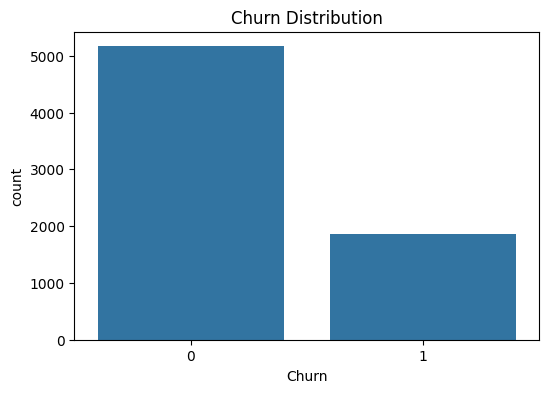

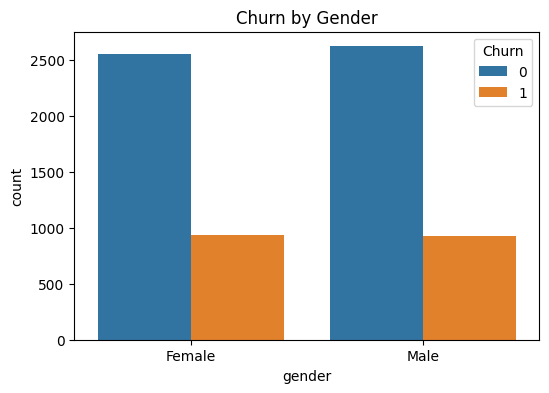

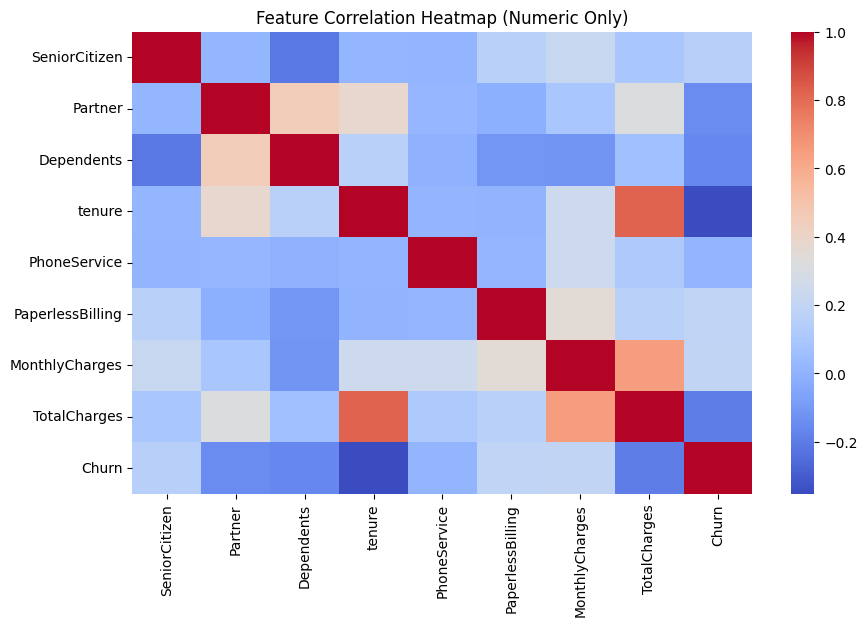

In [11]:
# ===============================================
#  STEP 5: Exploratory Data Analysis (EDA)
# ===============================================

# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Churn by gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

# Correlation heatmap
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap (Numeric Only)')
plt.show()



# We now convert the data from string to numerical form for the model to understand then split the data into training and testing